In [ ]:
!jupyter nbconvert --execute --to pdf "/content/drive/MyDrive/Colab Notebooks/ProgramacionParaIngeniería/Semana 14 -Agrupamiento.ipynb"

## **Arboles de decisión**

Según [1]  un arbol de decisión es un algoritmo de aprendizaje supervisado no paramétrico, que se utiliza tanto para tareas de clasificación como de regresión. De acuerdo con [2] se  aplican para tareas de clasificación son un subtipo de árbol de predicción para una variable de respuesta categórica.

Tiene una estructura jerárquica de árbol, que consta de un nodo raíz, ramas, nodos internos y nodos hoja.Como puede ver en el siguiente diagrama, un árbol de decisión comienza con un nodo raíz, que no tiene ninguna rama entrante. Las ramas salientes del nodo raíz luego alimentan los nodos internos, también conocidos como nodos de decisión. Con base a [2] este árbol se construye por medio del método de ***división binaria recursiva***.

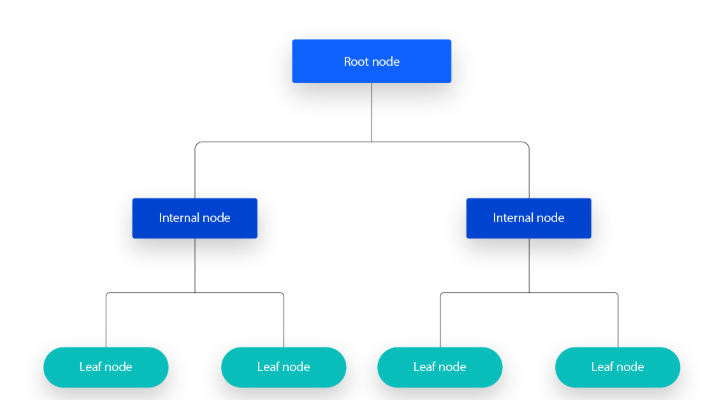

<p text-align="center">Tomado de [1]</p>

Para [1] este tipo de estructura en forma de árbol  también crea una representación fácil de digerir de la toma de decisiones, lo que permite a los diferentes grupos de una organización comprender mejor por qué se tomó una decisión.

De acuerdo con  [1] el aprendizaje de árboles de decisión emplea una estrategia de divide y vencerás realizando una búsqueda codiciosa para identificar los puntos de división óptimos dentro de un árbol. Este proceso de división se repite de forma descendente y recursiva hasta que todos o la mayoría de los registros se hayan clasificado con etiquetas de clase específicas. Para [1]   el **sobreajuste** se puede evitar si se emplea la  poda(**prunning**), la cual se trata de un proceso que elimina las ramas con características de poca  importancia. Sin embargo, para [2] además de la poda tambien se puede evitar limitando el tamaño del arbol con el métod de parada temprana(**early stopping**).

En un ábol de decisión los nodos se vinculan o asocian a atributos del conjunto de datos. Para asociarlos o vincularlos  se emplean dos métodos:**la ganancia de información y la impureza de Gini**.  Por consiguiente los nodos del árbol actuan como criterios  de división dentro del árbol.

La ganancia de información se basa en el concepto de entropía. La entropía mide la impureza de los valores de la muestra. Los valores de entropía pueden estar comprendidos entre 0 y 1.  Si todas las muestras del conjunto de datos,  pertenecen a una clase, entonces la entropía será igual a cero. Si la mitad de las muestras se clasifican en una clase y la otra mitad en otra, la entropía alcanzará su máximo en 1. Con el fin de seleccionar la mejor característica para dividir y encontrar el árbol de decisión óptimo, se debe utilizar el atributo con la menor cantidad de entropía. **La Ganancia de información** representa la diferencia en la entropía antes y después de una división en un atributo dado.

A juicio de [1] la impureza de GINI es la probabilidad de clasificar incorrectamente un punto de datos aleatorio del conjunto de datos si se etiquetara en función de la distribución de clases. Si pertenece a un clase su impureza es 0 [1] [4].

La ecuación de GINI es:

<center>$Gini(D)=1-\sum_{i=1}^m Pi^2 $ </br>
Donde Pi es la Probabilidad de una tupla o registro pertenezca a la clase

$IndiceGini = 1-(probabilidadCategoría1)^2-(probabilidadCategoría2)^2 $ </center>


***En [4] tenemos un ejemplo en el que el  conjunto de datos tiene un total de  10 registros o tuplas  pero de ellos sólo 3 son «demonios» y los 7 restantes son «asesinos», entonces:***

* ***La probabilidad de la categoría 1 (demonios) sería de 3/10 = 0.3***
* ***La probabilidad de la categoría 2 (asesinos) sería de 7/10 = 0.7***

En este caso el índice GINI sería igual a:
$IndiceGini=1-(3/10)^2-(7/10)^2=1-0.3^2-0.7^2=0.42 $


A criterio de [2] la prueba de bondad de ajuste  chi-cuadrado ($X^{2} $) tambien se emplea en la división de nodos de un árbol para verificar si existe una diferencia significativa entre los nodos hijos y el nodo parental. Cuando el árbol se crea con estas condiciones se nombra como CHAID(Chi-square automatic interaction detector).

**Ventajas de los árboles de decisión:**
Desde la posición de  [1] son útiles para tareas de minería de datos y descubrimiento de conocimiento. Los árboles son fáciles de interpretar, requieren poca preparación en los datos y son muy flexibles. Para [3] las ventajas son:

*  El árbol de decisión no tiene suposiciones sobre la distribución de los datos debido a la naturaleza no parámetrica del algoritmo.

*  Puede captar patrones no lineales.



**Desventajas de los árboles de decisión**
Desde el punto de vista de [1] los árboles de decisión son propensos al sobreajuste. Sin embargo, esto se puede evitar con procesos de poda(corte) previa a la construcción del árbol o posterior a su generación. Otra desventaja son los estimadores de alta varianza que ocacionan pequeñas variaciones dentro de los datos lo que produce un árbol de decisión diferente. Un método que reduce la varianza de los árboles de decisión es el ***embolsado*** o el ***promedio de estimaciones***. También, otra desventaja es el costo de su construcción.  Desde el punto de vista de [3] son sensibles a datos ruidosos.




## **Ejemplo 1**

Se tiene información de sillas infantiles de 400 tiendas distintas. Para cada una de las tiendas se han registrado 11 variables. Con base a estos datos se pretende generar un modelo de clasificación que permita predecir si una tienda tiene ventas altas **(ventas > 8) o bajas(ventas <=8)** en función de todas las variables disponibles.  Los datos de la tienda estan disponibles en los dataset de ejemplo de la librería statmodels.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation





## 1. **Carga del conjunto de datos**

In [ ]:
# load dataset
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MyData/CSV/diabetes.csv")

display(pima.head())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 ## **2.Preprocesado**
 Selección de características.


In [ ]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin','BMI','Age','Glucose', 'BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable


### **2.1 División de datos**


In [ ]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


## **3. Construcción del modelo de árbol de decisión**

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


## **4. Evaluación del modelo**

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6753246753246753


Obtuvimos un índice de clasificación del 67,53%, lo que se considera una buena precisión. Puedes mejorar esta precisión ajustando los parámetros del algoritmo del árbol de decisión.

## **5. Visualización del árbol de decisión**

**Se debe instalar la librería:**


*   pip install graphviz
*   pip install pydotplu



In [ ]:
!pip install six

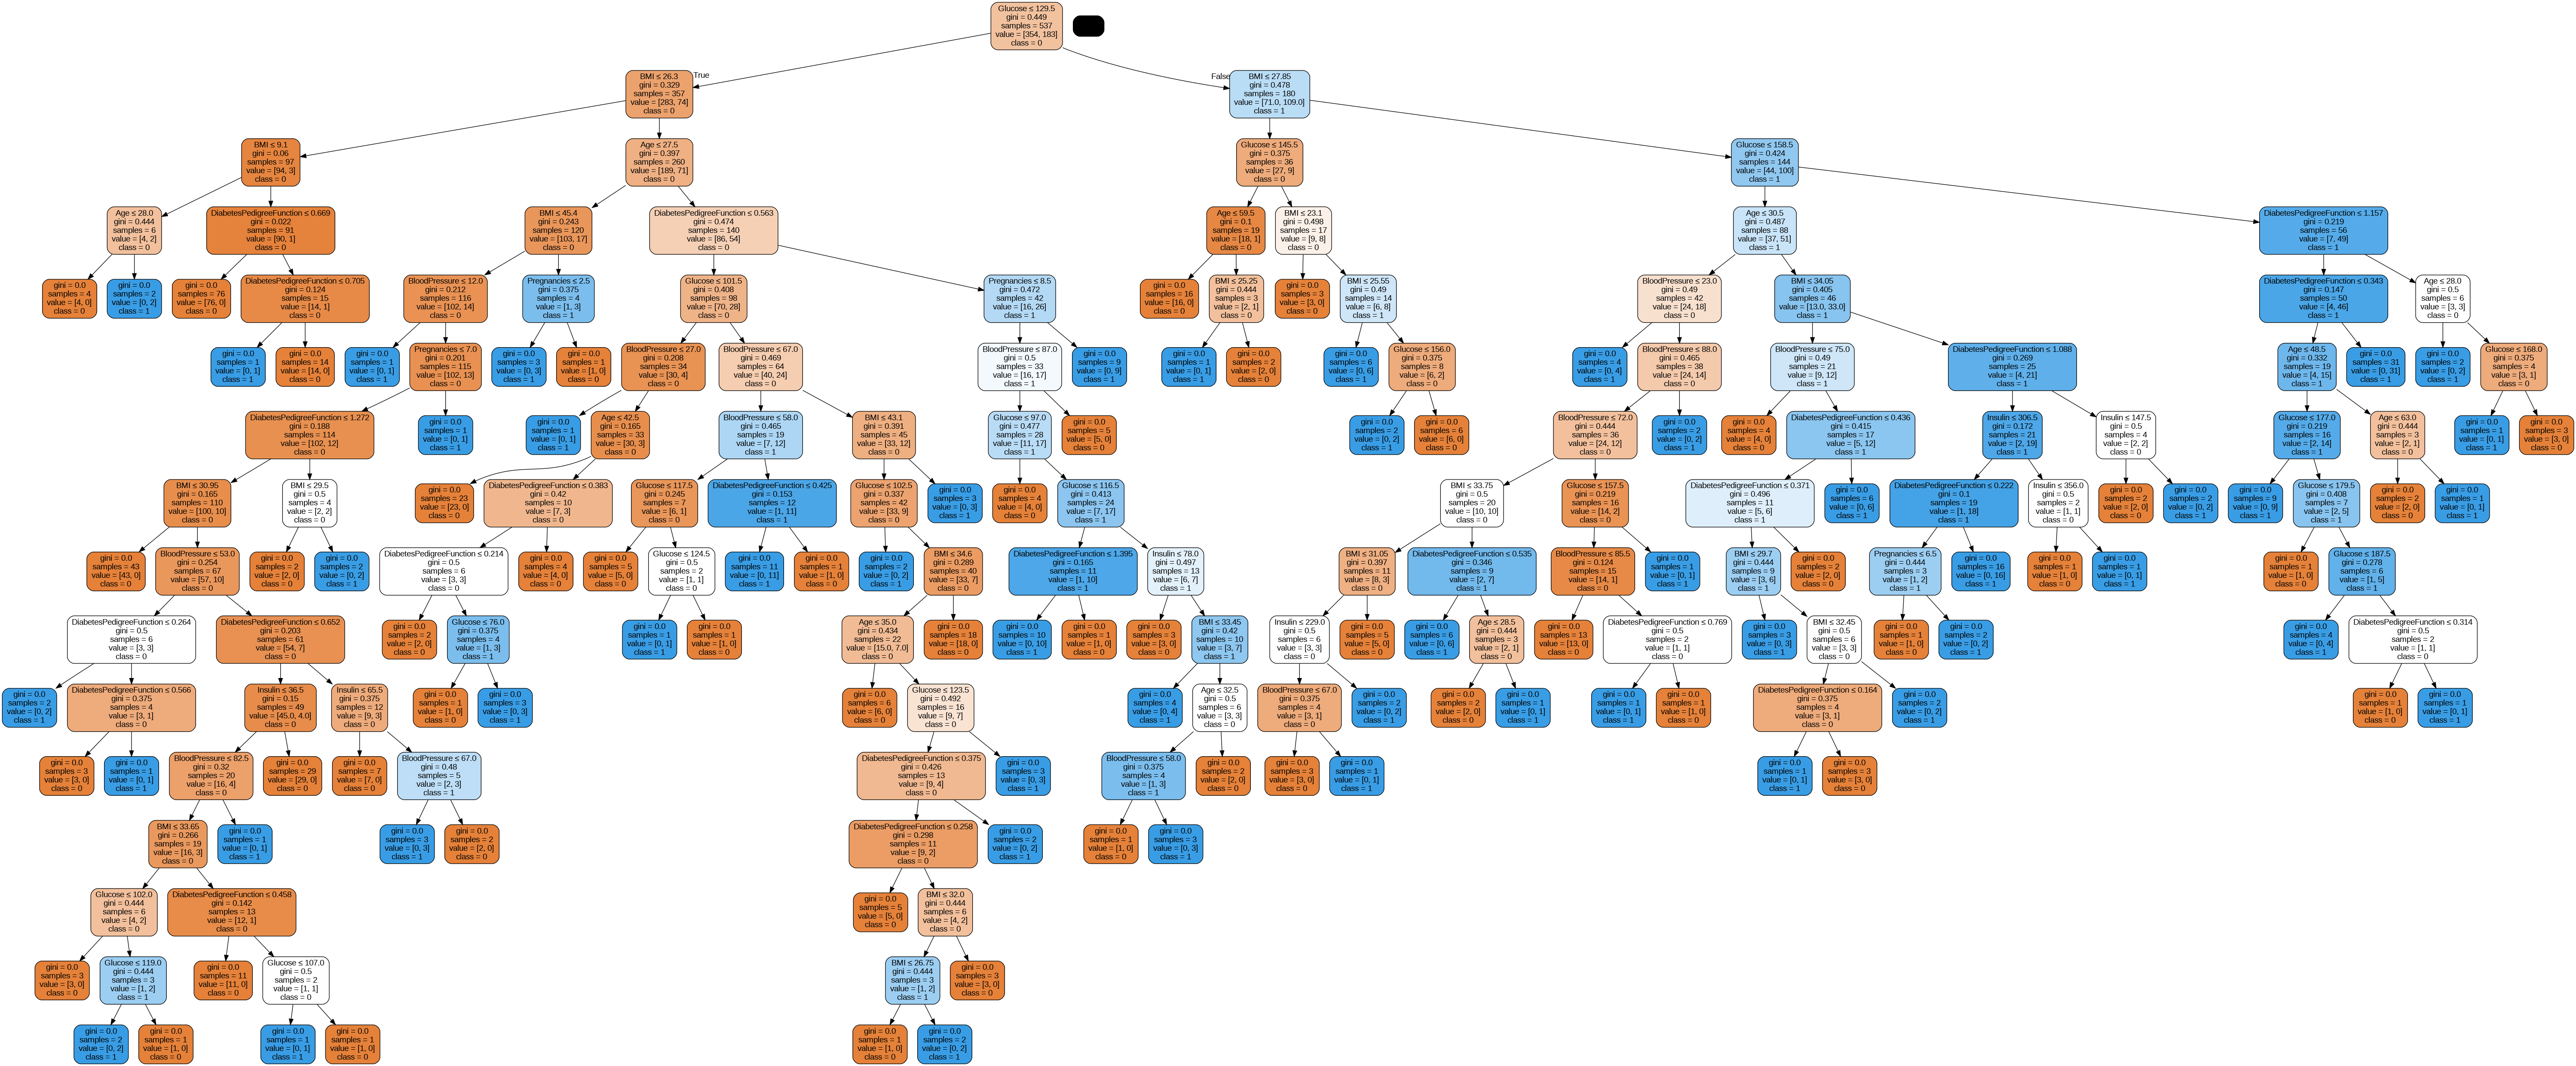

In [ ]:

from sklearn.tree import export_graphviz
import six
from IPython.display import Image
import pydotplus

dot_data = six.StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

## **6. Optimazación del ábol de decisión:**
Para optimizar el arbol de decisíon se pueden ajustar los hiperparámetros(Parámetros configurables por el usuario) del modelo. Algunos de estos parámetros son:

*   **Criterio(Medida de selección de atributos):** Si queremos asociar los atributos por el ratio GINI se debe configurar así: **criterion="gini"**. Si queremos utilizar el método de la ganancia de información debemos escribir: **criterion="entropy"**.

*   **Divisor(Estrategia de división):** configura la estrategia de división del arbol. Las estrategias admitidas son: **"mejor"** para elegir la mejor división y **"aleatoria"** para eligir la mejor decisión aleatoria.

* **Profundidad máxima del árbol:** este parámetro ajusta la expansión del árbol. Las opciones son: **valor_entero o None**. Si la opción es **"None"** los nodos se extienden hasta que todas la hojas contengan menos muestras que el parámetro **min_muetras_split**. Un valor entero muy alto genera **sobreajuste** y un valor entero muy bajo **infraajuste**.  



In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7705627705627706


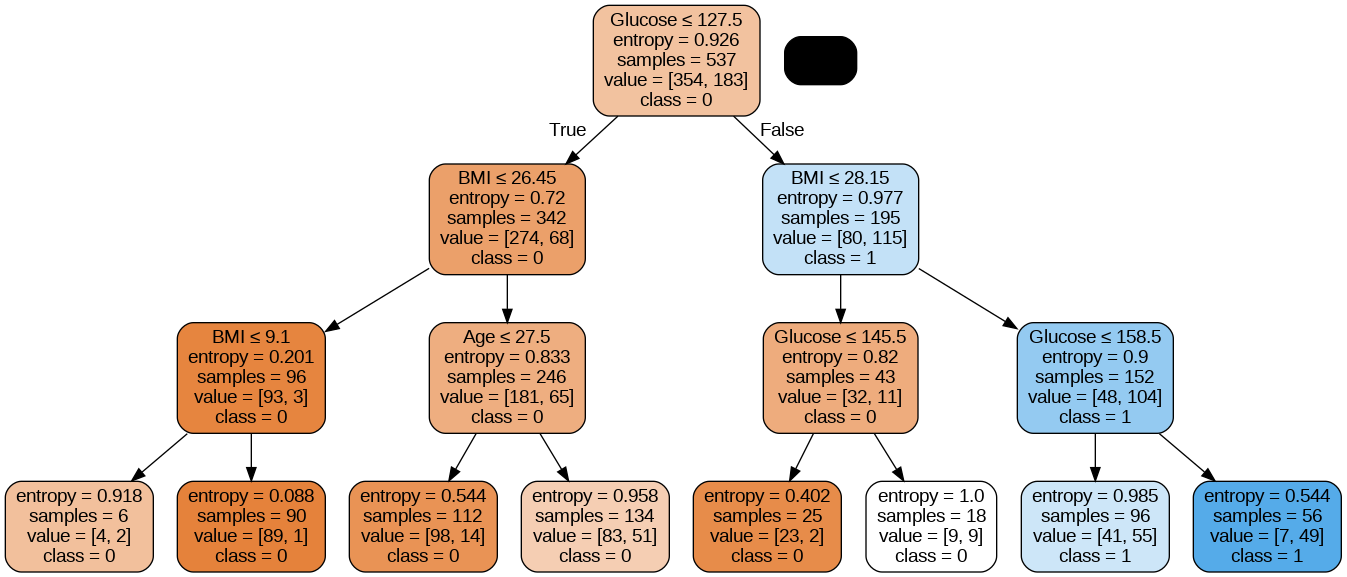

In [ ]:

dot_data = six.StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

## Problema resuelto2:



In [27]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df = pd.read_csv("R1_leo_2011-ADELANTE.csv",sep=";")
print(df.shape)
df.head()


(2008, 24)


,NUMERO,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,...,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO
0,1,1,0,20,0,0,0,474,66,66,...,58,0,65,79,20,6,9,3,2011,2
1,2,1,2,2,1,19,5,523,99,99,...,61,0,64,60,1,5,9,3,2011,2
2,3,0,2,20,1,121,18,483,64,64,...,63,0,64,77,20,6,9,3,2011,1
3,4,0,1,19,1,19,5,529,89,89,...,83,0,62,75,19,5,9,2,2011,1
4,5,0,2,8,1,19,5,478,78,78,...,66,0,60,70,8,3,9,3,2011,2


In [2]:
df= df.drop(["NUMERO"],axis=1)
display(df)

,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,...,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO
0,1,0,20,0,0,0,474,66,66,73,...,58,0,65,79,20,6,9,3,2011,2
1,1,2,2,1,19,5,523,99,99,70,...,61,0,64,60,1,5,9,3,2011,2
2,0,2,20,1,121,18,483,64,64,76,...,63,0,64,77,20,6,9,3,2011,1
3,0,1,19,1,19,5,529,89,89,70,...,83,0,62,75,19,5,9,2,2011,1
4,0,2,8,1,19,5,478,78,78,70,...,66,0,60,70,8,3,9,3,2011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0,0,0,0,0,0,342,68,0,0,...,68,70,0,58,11,5,9,3,2018,2
2004,1,0,0,0,0,0,347,69,0,0,...,71,69,0,71,19,5,10,1,2018,2
2005,0,0,0,0,0,0,348,67,0,0,...,67,76,0,68,11,5,9,2,2018,1
2006,0,0,0,0,0,0,340,70,0,0,...,67,66,0,63,11,5,9,3,2018,2


In [3]:
X =df.drop(['RENDIMIENTO_UNO'],axis=1)
display(X)


,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,...,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO
0,1,0,20,0,0,0,474,66,66,73,...,68,58,0,65,79,20,6,9,3,2011
1,1,2,2,1,19,5,523,99,99,70,...,81,61,0,64,60,1,5,9,3,2011
2,0,2,20,1,121,18,483,64,64,76,...,65,63,0,64,77,20,6,9,3,2011
3,0,1,19,1,19,5,529,89,89,70,...,74,83,0,62,75,19,5,9,2,2011
4,0,2,8,1,19,5,478,78,78,70,...,71,66,0,60,70,8,3,9,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0,0,0,0,0,0,342,68,0,0,...,71,68,70,0,58,11,5,9,3,2018
2004,1,0,0,0,0,0,347,69,0,0,...,68,71,69,0,71,19,5,10,1,2018
2005,0,0,0,0,0,0,348,67,0,0,...,69,67,76,0,68,11,5,9,2,2018
2006,0,0,0,0,0,0,340,70,0,0,...,71,67,66,0,63,11,5,9,3,2018


In [4]:
Y= df[['RENDIMIENTO_UNO']]
REND_UNO=df[['RENDIMIENTO_UNO']]
display(REND_UNO)

,RENDIMIENTO_UNO
0,2
1,2
2,1
3,1
4,2
...,...
2003,2
2004,2
2005,1
2006,2


In [5]:
from sklearn.preprocessing import LabelEncoder
X=X.astype("float32")
display(X)

,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,...,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO
0,1.0,0.0,20.0,0.0,0.0,0.0,474.0,66.0,66.0,73.0,...,68.0,58.0,0.0,65.0,79.0,20.0,6.0,9.0,3.0,2011.0
1,1.0,2.0,2.0,1.0,19.0,5.0,523.0,99.0,99.0,70.0,...,81.0,61.0,0.0,64.0,60.0,1.0,5.0,9.0,3.0,2011.0
2,0.0,2.0,20.0,1.0,121.0,18.0,483.0,64.0,64.0,76.0,...,65.0,63.0,0.0,64.0,77.0,20.0,6.0,9.0,3.0,2011.0
3,0.0,1.0,19.0,1.0,19.0,5.0,529.0,89.0,89.0,70.0,...,74.0,83.0,0.0,62.0,75.0,19.0,5.0,9.0,2.0,2011.0
4,0.0,2.0,8.0,1.0,19.0,5.0,478.0,78.0,78.0,70.0,...,71.0,66.0,0.0,60.0,70.0,8.0,3.0,9.0,3.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0.0,0.0,0.0,0.0,0.0,0.0,342.0,68.0,0.0,0.0,...,71.0,68.0,70.0,0.0,58.0,11.0,5.0,9.0,3.0,2018.0
2004,1.0,0.0,0.0,0.0,0.0,0.0,347.0,69.0,0.0,0.0,...,68.0,71.0,69.0,0.0,71.0,19.0,5.0,10.0,1.0,2018.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,348.0,67.0,0.0,0.0,...,69.0,67.0,76.0,0.0,68.0,11.0,5.0,9.0,2.0,2018.0
2006,0.0,0.0,0.0,0.0,0.0,0.0,340.0,70.0,0.0,0.0,...,71.0,67.0,66.0,0.0,63.0,11.0,5.0,9.0,3.0,2018.0


In [6]:
uniqueY= Y['RENDIMIENTO_UNO'].unique()
print(uniqueY)

Y=LabelEncoder().fit_transform(Y.astype('str'))
print(np.unique(Y))




[2 1 3 4]
[0 1 2 3]


c:\ProyectosPython\cienciadedatos\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
X_T_JOHNSON=X.copy(deep=True)
display(X_T_JOHNSON)
from numpy import set_printoptions
from sklearn.preprocessing import PowerTransformer
Transformation_JOHNSON=PowerTransformer(method='yeo-johnson',standardize=True).fit(X_T_JOHNSON)
Reescalar_X_T_JOHNSON=Transformation_JOHNSON.transform(X_T_JOHNSON)
print(Reescalar_X_T_JOHNSON)


,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,...,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO
0,1.0,0.0,20.0,0.0,0.0,0.0,474.0,66.0,66.0,73.0,...,68.0,58.0,0.0,65.0,79.0,20.0,6.0,9.0,3.0,2011.0
1,1.0,2.0,2.0,1.0,19.0,5.0,523.0,99.0,99.0,70.0,...,81.0,61.0,0.0,64.0,60.0,1.0,5.0,9.0,3.0,2011.0
2,0.0,2.0,20.0,1.0,121.0,18.0,483.0,64.0,64.0,76.0,...,65.0,63.0,0.0,64.0,77.0,20.0,6.0,9.0,3.0,2011.0
3,0.0,1.0,19.0,1.0,19.0,5.0,529.0,89.0,89.0,70.0,...,74.0,83.0,0.0,62.0,75.0,19.0,5.0,9.0,2.0,2011.0
4,0.0,2.0,8.0,1.0,19.0,5.0,478.0,78.0,78.0,70.0,...,71.0,66.0,0.0,60.0,70.0,8.0,3.0,9.0,3.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,0.0,0.0,0.0,0.0,0.0,0.0,342.0,68.0,0.0,0.0,...,71.0,68.0,70.0,0.0,58.0,11.0,5.0,9.0,3.0,2018.0
2004,1.0,0.0,0.0,0.0,0.0,0.0,347.0,69.0,0.0,0.0,...,68.0,71.0,69.0,0.0,71.0,19.0,5.0,10.0,1.0,2018.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,348.0,67.0,0.0,0.0,...,69.0,67.0,76.0,0.0,68.0,11.0,5.0,9.0,2.0,2018.0
2006,0.0,0.0,0.0,0.0,0.0,0.0,340.0,70.0,0.0,0.0,...,71.0,67.0,66.0,0.0,63.0,11.0,5.0,9.0,3.0,2018.0


[[ 1.4259148  -0.9306264   1.2263107  ...  0.21117978  0.9157391
  -1.5626022 ]
 [ 1.4259148   1.3240983  -1.1091399  ...  0.21117978  0.9157391
  -1.5626022 ]
 [-0.70130426  1.3240983   1.2263107  ...  0.21117978  0.9157391
  -1.5626022 ]
 ...
 [-0.70130426 -0.9306264  -1.5720342  ...  0.21117978 -0.57410145
   1.5225084 ]
 [-0.70130426 -0.9306264  -1.5720342  ...  0.21117978  0.9157391
   1.5225084 ]
 [ 1.4259148  -0.9306264  -1.5720342  ...  0.21117978 -0.57410145
   1.5225084 ]]


c:\ProyectosPython\cienciadedatos\.venv\Lib\site-packages\numpy\_core\_methods.py:194: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\ProyectosPython\cienciadedatos\.venv\Lib\site-packages\numpy\_core\_methods.py:205: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


In [9]:
X_pandas_T_JOHNSON=pd.DataFrame(Reescalar_X_T_JOHNSON,columns=X.columns)
display(X_pandas_T_JOHNSON)
#

,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,...,LITERATURA_ICFES,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO
0,1.425915,-0.930626,1.226311,-0.946527,-0.932239,-0.935053,1.594288,-0.785448,0.659432,1.003832,...,0.572083,-0.776711,-0.781967,1.027201,1.263007,1.353436,1.295224,0.211180,0.915739,-1.562602
1,1.425915,1.324098,-1.109140,1.024870,0.871811,0.881765,2.496176,2.968962,1.092583,0.977482,...,2.143884,-0.428105,-0.781967,1.017159,-0.309421,-2.362879,0.550878,0.211180,0.915739,-1.562602
2,-0.701304,1.324098,1.226311,1.024870,1.512984,1.578680,1.762976,-1.023572,0.629451,1.029269,...,0.175104,-0.192069,-0.781967,1.017159,1.094287,1.353436,1.295224,0.211180,0.915739,-1.562602
3,-0.701304,0.708158,1.124151,1.024870,0.871811,0.881765,2.603949,1.861875,0.971664,0.977482,...,1.325292,2.316401,-0.781967,0.996666,0.926277,1.201965,0.550878,0.211180,-0.574101,-1.562602
4,-0.701304,1.324098,-0.155777,1.024870,0.871811,0.881765,1.669436,0.615144,0.829086,0.977482,...,0.955135,0.167292,-0.781967,0.975599,0.509468,-0.682326,-0.889589,0.211180,0.915739,-1.562602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,-0.701304,-0.930626,-1.572034,-0.946527,-0.932239,-0.935053,-1.071123,-0.548742,-1.338546,-1.097676,...,0.955135,0.410327,1.287576,-1.096359,-0.470669,-0.117093,0.550878,0.211180,0.915739,1.522508
2004,1.425915,-0.930626,-1.572034,-0.946527,-0.932239,-0.935053,-0.962498,-0.430904,-1.338546,-1.097676,...,0.572083,0.779947,1.284630,-1.096359,0.592454,1.201965,0.550878,3.609206,-1.975565,1.522508
2005,-0.701304,-0.930626,-1.572034,-0.946527,-0.932239,-0.935053,-0.940858,-0.666921,-1.338546,-1.097676,...,0.701259,0.288467,1.304144,-1.096359,0.344075,-0.117093,0.550878,0.211180,-0.574101,1.522508
2006,-0.701304,-0.930626,-1.572034,-0.946527,-0.932239,-0.935053,-1.114772,-0.313405,-1.338546,-1.097676,...,0.955135,0.288467,1.275438,-1.096359,-0.065920,-0.117093,0.550878,0.211180,0.915739,1.522508


In [10]:
df = pd.concat([X_pandas_T_JOHNSON,REND_UNO],axis=1)
display(df)

,GENERO,TIPO_COLEGIO,LOCALIDAD_COLEGIO,CALENDARIO,MUNICIPIO,DEPARTAMENTO,PG_ICFES,CON_MAT_ICFES,APT_MAT_ICFES,FISICA_ICFES,...,BIOLOGIA_ICFES,SOCIALES_ICFES,FILOSOFIA_ICFES,IDIOMA_ICFES,LOCALIDAD,DISTANCIA,INSCRIPCION,ESTRATO,ANO_INGRESO,RENDIMIENTO_UNO
0,1.425915,-0.930626,1.226311,-0.946527,-0.932239,-0.935053,1.594288,-0.785448,0.659432,1.003832,...,-0.776711,-0.781967,1.027201,1.263007,1.353436,1.295224,0.211180,0.915739,-1.562602,2
1,1.425915,1.324098,-1.109140,1.024870,0.871811,0.881765,2.496176,2.968962,1.092583,0.977482,...,-0.428105,-0.781967,1.017159,-0.309421,-2.362879,0.550878,0.211180,0.915739,-1.562602,2
2,-0.701304,1.324098,1.226311,1.024870,1.512984,1.578680,1.762976,-1.023572,0.629451,1.029269,...,-0.192069,-0.781967,1.017159,1.094287,1.353436,1.295224,0.211180,0.915739,-1.562602,1
3,-0.701304,0.708158,1.124151,1.024870,0.871811,0.881765,2.603949,1.861875,0.971664,0.977482,...,2.316401,-0.781967,0.996666,0.926277,1.201965,0.550878,0.211180,-0.574101,-1.562602,1
4,-0.701304,1.324098,-0.155777,1.024870,0.871811,0.881765,1.669436,0.615144,0.829086,0.977482,...,0.167292,-0.781967,0.975599,0.509468,-0.682326,-0.889589,0.211180,0.915739,-1.562602,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,-0.701304,-0.930626,-1.572034,-0.946527,-0.932239,-0.935053,-1.071123,-0.548742,-1.338546,-1.097676,...,0.410327,1.287576,-1.096359,-0.470669,-0.117093,0.550878,0.211180,0.915739,1.522508,2
2004,1.425915,-0.930626,-1.572034,-0.946527,-0.932239,-0.935053,-0.962498,-0.430904,-1.338546,-1.097676,...,0.779947,1.284630,-1.096359,0.592454,1.201965,0.550878,3.609206,-1.975565,1.522508,2
2005,-0.701304,-0.930626,-1.572034,-0.946527,-0.932239,-0.935053,-0.940858,-0.666921,-1.338546,-1.097676,...,0.288467,1.304144,-1.096359,0.344075,-0.117093,0.550878,0.211180,-0.574101,1.522508,1
2006,-0.701304,-0.930626,-1.572034,-0.946527,-0.932239,-0.935053,-1.114772,-0.313405,-1.338546,-1.097676,...,0.288467,1.275438,-1.096359,-0.065920,-0.117093,0.550878,0.211180,0.915739,1.522508,2


In [11]:
df.drop(['GENERO'],axis="columns",inplace=True)
df.drop(['TIPO_COLEGIO'],axis="columns",inplace=True)
df.drop(['LOCALIDAD_COLEGIO'],axis="columns",inplace=True)
df.drop(['CALENDARIO'],axis="columns",inplace=True)
df.drop(['MUNICIPIO'],axis="columns",inplace=True)
df.drop(['DEPARTAMENTO'],axis="columns",inplace=True)
#df.drop(['PG_ICFES'],axis="columns",inplace=True)
#df.drop(['CON_MAT_ICFES'],axis="columns",inplace=True)
df.drop(['APT_MAT_ICFES'],axis="columns",inplace=True)
#df.drop(['FISICA_ICFES'],axis="columns",inplace=True)
#df.drop(['QUIMICA_ICFES'],axis="columns",inplace=True)
df.drop(['APT_VERB_ICFES'],axis="columns",inplace=True)
df.drop(['LITERATURA_ICFES'],axis="columns",inplace=True)
df.drop(['BIOLOGIA_ICFES'],axis="columns",inplace=True)
df.drop(['SOCIALES_ICFES'],axis="columns",inplace=True)
df.drop(['FILOSOFIA_ICFES'],axis="columns",inplace=True)
df.drop(['DISTANCIA'],axis="columns",inplace=True)
df.drop(['INSCRIPCION'],axis="columns",inplace=True)
df.drop(['ESTRATO'],axis="columns",inplace=True)
df.drop(['ANO_INGRESO'],axis="columns",inplace=True)
display(df)

,PG_ICFES,CON_MAT_ICFES,FISICA_ICFES,QUIMICA_ICFES,IDIOMA_ICFES,LOCALIDAD,RENDIMIENTO_UNO
0,1.594288,-0.785448,1.003832,1.045102,1.263007,1.353436,2
1,2.496176,2.968962,0.977482,1.078446,-0.309421,-2.362879,2
2,1.762976,-1.023572,1.029269,1.102515,1.094287,1.353436,1
3,2.603949,1.861875,0.977482,1.070248,0.926277,1.201965,1
4,1.669436,0.615144,0.977482,0.964111,0.509468,-0.682326,2
...,...,...,...,...,...,...,...
2003,-1.071123,-0.548742,-1.097676,-1.097415,-0.470669,-0.117093,2
2004,-0.962498,-0.430904,-1.097676,-1.097415,0.592454,1.201965,2
2005,-0.940858,-0.666921,-1.097676,-1.097415,0.344075,-0.117093,1
2006,-1.114772,-0.313405,-1.097676,-1.097415,-0.065920,-0.117093,2


In [12]:
X=df.drop(['RENDIMIENTO_UNO'],axis=1)
Y=df[['RENDIMIENTO_UNO']]
from sklearn.preprocessing import LabelEncoder
X=X.astype("float32")
Y=LabelEncoder().fit_transform(Y.astype('str'))
print(np.unique(Y))

[0 1 2 3]


c:\ProyectosPython\cienciadedatos\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
print('Datos: son {} datos para entrenamiento y {} datos para prueba'.format(X_train.shape[0],X_test.shape[0]))

Datos: son 1405 datos para entrenamiento y 603 datos para prueba


In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf=DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [18]:
import numpy as np
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters={'max_depth':[2,3,4,5,6,None],
            'min_samples_split':[2,4,6,8,10,15],
            'min_samples_leaf':[1,3,5,7,9],
            'max_features':[2,3,4,5,6,7,'sqrt'],
            'splitter':["better","random"],
            'random_state':[1,5,10],
            'criterion':("gini","entropy")
            }
modelo=DecisionTreeClassifier()
parameters



{'max_depth': [2, 3, 4, 5, 6, None],
 'min_samples_split': [2, 4, 6, 8, 10, 15],
 'min_samples_leaf': [1, 3, 5, 7, 9],
 'max_features': [2, 3, 4, 5, 6, 7, 'sqrt'],
 'splitter': ['better', 'random'],
 'random_state': [1, 5, 10],
 'criterion': ('gini', 'entropy')}

In [28]:
semilla=2
num_folds=10
kfold=KFold(n_splits=num_folds,shuffle=True,random_state=semilla)
metrica = 'accuracy'

grid =GridSearchCV(estimator=modelo,param_grid=parameters,scoring=metrica,cv=kfold)
grid_result=grid.fit(X_train,Y_train)


print("Resultado de GridSearchCV para el modelo")
print("Mejor valor de exatitud usando kfold:",grid_result.best_score_)
print("Mejor valor de Hipérparametro usando parametros:",grid_result.best_params_)
#
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']

#for mean,stdev,param in zip(means,stds,params):
#    print("%f (%f) with: %r"%(mean,stdev,param))
#



Resultado de GridSearchCV para el modelo
Mejor valor de exatitud usando kfold: 0.6248936170212767
Mejor valor de Hipérparametro usando parametros: {'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 8, 'random_state': 10, 'splitter': 'random'}


In [20]:
kfold=KFold(n_splits=10,random_state=2,shuffle=True)

modelo=DecisionTreeClassifier(criterion="gini",max_depth=6,max_features=7,min_samples_leaf=7,min_samples_split=15,splitter="random",random_state=5)


In [23]:
from sklearn.model_selection import cross_val_score
resultados=cross_val_score(modelo,X_train,Y_train,cv=kfold,scoring='accuracy')
resultados_datos_prueba=cross_val_score(modelo,X_test,Y_test,cv=kfold,scoring='accuracy')

print("Rendimiento del modelo con datos de entrenamiento")
print("Promedio de exactitud(accuracy) usando k-fold:",resultados.mean()*100,"%")
print("Desviación estandar de exactitud(accuracy) usando k-fold:",resultados.std()*100,"% \n")


print("Rendimiento del modelo con datos de prueba")
print("Promedio de exactitud(accuracy) usando k-fold:",resultados_datos_prueba.mean()*100,"%")
print("Desviación estandar de exactitud(accuracy) usando k-fold:",resultados_datos_prueba.std()*100,"%")


Rendimiento del modelo con datos de entrenamiento
Promedio de exactitud(accuracy) usando k-fold: 60.84650455927052 %
Desviación estandar de exactitud(accuracy) usando k-fold: 3.9514921199879462 % 

Rendimiento del modelo con datos de prueba
Promedio de exactitud(accuracy) usando k-fold: 60.37158469945355 %
Desviación estandar de exactitud(accuracy) usando k-fold: 3.3452978860172213 %


## **Problema por resolver:**

Debe resolver los siguiente problemas computacionales por medio de árboles de decisión. Los algoritmos propuestos deben mostrar claramente el modelo, las pruebas aplicadas sobre este y la interpretación de las métricas usadas para evaluar su rendimiento. Los códigos y la documentación del proceso deben  deben entregarse mediante un PDF generado por jupyternotebook. Este documento debe llevar como anexo la gráfica del árbol generado.

1.   Clasifique el conjunto de datos wine.Visite al documentación de lo dato en el siguiente [enlace.](https://https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#load-wine).
2.   Clasifique el conjunto de datos Diabetes. La documentación reposa en el siguiente [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes). En este problema debe aplicar las siguientes **imposiciones**:
  * Es obligatorio dividir este conjunto de datos en conjunto de entrenamiento y prueba.
  *  Debe predecir con datos del conjunto de prueba.
  *  Debe evaluar el modelo mediante métricas e interpretar los resultados.

3. Clasifique  el conjunto de datos **breask_cancer**.Consulte su documentación en el siguiente [enlace](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer). Debe aplicar las anteriores imposiciones en este conjunto de datos.

**Notas:**
1. Debe estar presente el estudiante para resolverle las dudas del docente.
2. Debe escribir código con la sintaxis del lenguaje python y ordenar los código aplicando programación orientada a objetos.


# **Referencias**



[1] IBM, «Qué es un árbol de decisión?» Accedido: 16 de mayo de 2025. [En línea]. Disponible en: https://www.ibm.com/es-es/think/topics/decision-trees

[2] J. Amat, «Árboles de decisión con Python: regresión y clasificación», https://cienciadedatos.net/. Accedido: 17 de mayo de 2025. [En línea]. Disponible en: https://cienciadedatos.net/documentos/py07_arboles_decision_python

[3] Datacamp, «Tutorial de Clasificación en Árbol de Decisión en Python». Accedido: 17 de mayo de 2025. [En línea]. Disponible en: https://www.datacamp.com/es/tutorial/decision-tree-classification-python

[4] M. Sotaquirá, «Codificando Bits», Codificando Bits. Accedido: 18 de mayo de 2025. [En línea]. Disponible en: https://codificandobits.com/blog/clasificacion-arboles-decision-algoritmo-cart/


